In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
#loading the dataset
uber = pd.read_csv("uber-raw-data-sep14.csv") 
uber

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [5]:
#strip column names of extra spaces (if any)
uber.columns = uber.columns.str.strip() 
uber 

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [6]:
#converting "Date/Time" column from string data type into DateTime
uber['Date/Time'] = pd.to_datetime(uber['Date/Time'])
uber 

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764


In [7]:
#breaking down the "Date/Time" column into "Day", "Hour", and "Weekday"
uber['Day'] = uber['Date/Time'].dt.day
uber['Hour'] = uber['Date/Time'].dt.hour
uber['Weekday'] = uber['Date/Time'].dt.weekday
uber 

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0
...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,22,1
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,22,1
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,22,1
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,22,1


In [8]:
#preparing the data for Random Forest Model
X = uber[['Hour', 'Day', 'Weekday']]
uber['Trip_Count'] = uber.groupby(['Hour', 'Day', 'Weekday'])['Hour'].transform('count')
y = uber['Trip_Count'] 

In [9]:
#spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [10]:
#initialising and training Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) 

RandomForestRegressor(random_state=42)

In [12]:
#making predictions based on the test set
y_pred = rf_model.predict(X_test) 

In [13]:
#evaluating the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Regressor Mean Squared Error: {mse}") 

Random Forest Regressor Mean Squared Error: 0.0


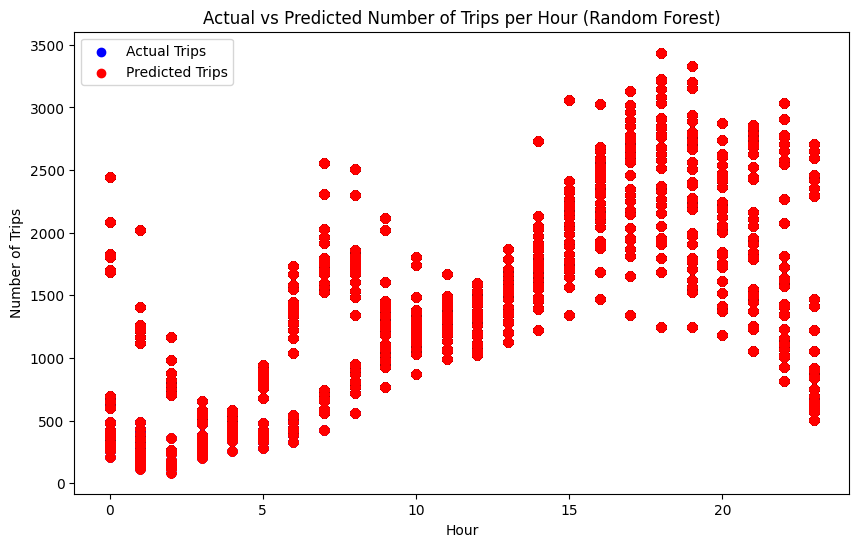

In [14]:
#visualizing the Actual vs Predicted Number of Trips
plt.figure(figsize=(10,6))
plt.scatter(X_test['Hour'], y_test, color='blue', label='Actual Trips')
plt.scatter(X_test['Hour'], y_pred, color='red', label='Predicted Trips')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Actual vs Predicted Number of Trips per Hour (Random Forest)')
plt.legend()
plt.show() 